# Week 1: Tutorial

In this tutorial file, you will learn 
- Reading data to Python using `Pandas` package
- Selecting columns, filtering rows and slicing data
- Preprocessing data
  - Locating and counting missing variables
  - Locating and removing duplicate variables

Make sure you have downloaded all data sets below from the Module Introduction page and saved them in the same folder of this notebook file.

- diabetes.csv
- diabetes_headless.csv
- diabetes_nrow.csv
- diabetes_semicol.csv

## Load Python Packages

Load `pandas` and `numpy` packages

In [9]:
import pandas as pd
import numpy as np

## Read the Data Set

Read the `diabetes.csv` dataset

In [10]:
# Import the data set
diabetes = pd.read_csv('diabetes - Copy (2).csv')

# View the first 5 rows


# When running the cell, you should see the output table below.

We can also see the first _n_ rows by adding a number in the brackets. For example, let's have a look at the first 10 rows:

In [4]:
diabetes.head(...)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Parameter: `sep`

Now, let's try to read a semicolon-separated data set and see how to fix the format issue.

In [7]:
# Import the data set
diabetes_scol = pd.read_csv('diabetes_semicol.csv')

# View the first 3 rows
diabetes_scol.head(3)

,Pregnancies;Glucose;BloodPressure;SkinThickness;Insulin;BMI;DiabetesPedigreeFunction;Age;Outcome
0,6;148;72;35;0;33.6;0.627;50;1
1,1;85;66;29;0;26.6;0.351;31;0
2,8;183;64;0;0;23.3;0.672;32;1


The data is not read properly. It expects to see separate columns but cannot find one, so all information is written in one column. To solve this problem, we need to specify the separator using `sep=';'`.

In [8]:
diabetes_scol = pd.read_csv('diabetes_semicol.csv',...)
diabetes_scol.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Parameter: `skiprows`

Sometimes, our data set may contain information that we don't want to include for analysis. For example, let's have a look at the "diabetes_nrow.csv" data.

In [11]:
# Import the data set
diabetes_nrow = pd.read_csv('diabetes_nrow.csv')

# View the first 5 rows
diabetes_nrow.head()

,,,,,,,,Below you can find diabets statistics of 9 patients:
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0


It is not read properly because it contains a description line on the top. Also note the second row is blank which does not show in the output above. We can skip the first two rows using `skiprows=2`.

In [12]:
diabetes_nrow = pd.read_csv('diabetes_nrow.csv', skiprows=2)
diabetes_nrow.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Parameter: `header`

When the data set doesn't have a header row, the first row will be treated as the column names. For example, let's look at the "diabetes_headless.csv" data.

In [13]:
# Import the data set
diabetes_head = pd.read_csv('diabetes_headless.csv')

# View the first 5 rows
diabetes_head.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


To avoid this importing mistake, we need to add `header=None` to assign a header separately.

In [14]:
diabetes_head = pd.read_csv('diabetes_headless.csv', header=None)
diabetes_head.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


To be more specific, we can overwrite the header row with proper names using `DataFrame.columns`:

In [16]:
colnames = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_head.columns = ...

diabetes_head.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Row and Column Operations

In [ ]:
diabetes = pd.read_csv('diabetes.csv')

In [20]:
# head
...

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Also, `df.shape` tells you how many rows and columns this data set has:

In [24]:
# shape
...

(768, 9)

The data has 768 rows and 9 columns corresponding to 768 observations and 9 variables/features.

A more comprehensive check is the `info()` method. Not only does it show the columns and rows, it also shows the data types and memory usage.

In [25]:
# info
...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


---

## Select Columns or Rows

Let's assume we want to select the __Age__ column. We run:

In [31]:
diabetes.iloc[4,7]

33

Take a look at the first 10 rows to make an intial check of the data import:

In [27]:
diabetes['Age'][4]

33

The result is NOT a pd.DataFrame but a pd.Series object which is one column of a pd.DataFrame. In other words, __a pd.DataFrame consists of many pd.Series objects.__

Note that in Python, __indices start from 0 (not 1)__. Here, the index is seen on the left of the series object. Therefore, if we want the 5th observation, we can write:

### Select More Than One Column

If we want to select more than one column, we must specify the names as another list. Let's assume we want to select the __Glucose__, __BMI__, and __Age__ columns. We can:

1. Plug in the name of the columns as:

TypeError: string indices must be integers, not 'list'

In [42]:
type(diabetes[cnames])

pandas.core.frame.DataFrame

In [43]:
type(diabetes['Age'])

pandas.core.series.Series

2. Or directly define the names without creating a list:

In [11]:
# ['Glucose','BMI', 'Age']
diabetes[['Glucose','BMI', 'Age']]

,Glucose,BMI,Age
0,148,33.6,50
1,85,26.6,31
2,183,23.3,32
3,89,28.1,21
4,137,43.1,33
...,...,...,...
763,101,32.9,63
764,122,36.8,27
765,121,26.2,30
766,126,30.1,47


Alternatively, we can use `iloc`:

In [19]:
# iloc [1,5,7]

#Show first 3 columns
diabetes.iloc[:,:4]

#with variables, split inputs to X and outputs to Y

x,y = diabetes.iloc[:,:-1], diabetes.iloc[:,-1:]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


---

## Find Missing Values

Some missing values are subtle. In our data file, missing values are coded as 0s. We don't expect there to be a person whose __Glucose__, __BloodPressure__, __SkinThickness__, __Insulin__, and __BMI__ values are zero. We can replace these values with "np.NaN":

In [50]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [20]:
diabetes[['Glucose','BloodPressure','SkinThickness']].replace(0,np.NaN)

,Glucose,BloodPressure,SkinThickness
0,148.0,72.0,35.0
1,85.0,66.0,29.0
2,183.0,64.0,NaN
3,89.0,66.0,23.0
4,137.0,40.0,35.0
...,...,...,...
763,101.0,76.0,48.0
764,122.0,70.0,27.0
765,121.0,72.0,23.0
766,126.0,60.0,NaN


In [21]:
diabetes[['Glucose','BloodPressure','SkinThickness']] = diabetes[['Glucose','BloodPressure','SkinThickness']].replace(0,np.NaN)
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,NaN,0,30.1,0.349,47,1


Now, let's use `isna()` to see whether each cell is a missing value or not (`True` for missing value).

However, we would like to see for each column whether there are any missing values. Try again with the `sum()` method to sum the Boolean values up by columns.

<Axes: >

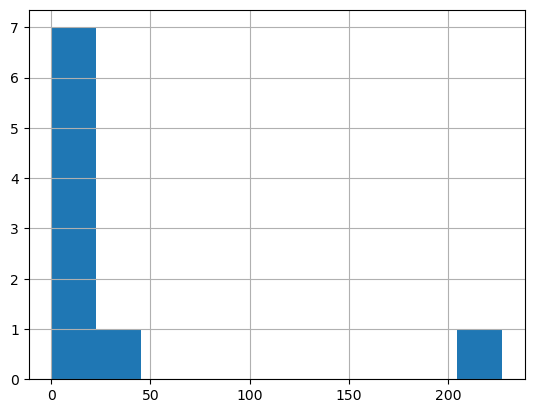

In [29]:
# NA in each row (axis=1)

#sum amount of missing values
#diabetes.isna().sum()

#
diabetes.isna().sum(axis=0)

diabetes.isna().sum(axis=0).hist()

In [69]:
# NA in each column (axis=0)
...

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

>__Task 2__
>
>There are two more columns (__Insulin__ and __BMI__) where missing values are coded as 0. Replace them with "np.NaN" as well and count how many missing variables are in Insulin and BMI columns

In [34]:
diabetes_df = diabetes[['Insulin','BMI']].replace(0, np.NaN)
diabetes.isna().sum()

diabetes_df = diabetes_df.dropna(axis=0, how='any')
diabetes_df

,Insulin,BMI
3,94.0,28.1
4,168.0,43.1
6,88.0,31.0
8,543.0,30.5
13,846.0,30.1
...,...,...
753,510.0,43.3
755,110.0,36.5
760,16.0,28.4
763,180.0,32.9


In [ ]:
...

---

## Remove Missing Values

In [87]:
diabetes_df = pd.read_csv('diabetes.csv')

diabetes_df[['Glucose','BloodPressure','SkinThickness']] = diabetes_df[['Glucose','BloodPressure','SkinThickness']].replace(0,np.NaN)
diabetes_df[['Insulin','BMI']] = diabetes_df[['Insulin','BMI']].replace(0,np.NaN)

In [88]:
diabetes_df.shape

(768, 9)

In [83]:
diabetes_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

To remove missing values, we can use `pd.DataFrame.dropna()`. See [pd.DataFrame.dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) for the important parameters.


__Glucose__ and __BMI__ have a relatively small portion of missing values, so let's remove the rows with missing values:

In [84]:
diabetes_df.dropna(subset=['Glucose','BMI'], inplace=True)

In [85]:
diabetes_df.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                28
SkinThickness               218
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Or we can remove all rows with missing variables

In [86]:
diabetes_df.shape

(752, 9)

In [28]:
diabetes_df = diabetes_df.dropna(axis=1, how='any')
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
diabetes_df.shape

(392, 9)

---

## Replace Missing Values with Proper Values

In [89]:
diabetes_df = pd.read_csv('diabetes.csv')

diabetes_df[['Glucose','BloodPressure','SkinThickness']] = diabetes_df[['Glucose','BloodPressure','SkinThickness']].replace(0,np.NaN)
diabetes_df[['Insulin','BMI']] = diabetes_df[['Insulin','BMI']].replace(0,np.NaN)

The `Dataframe.fillna()` function fills the missing values with a given method. See [pandas.DataFrame.fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) for the important parameters.

Let's start with replacing values with their averages. Since each column has a different average, we need to do it separately. For example, if we want to replace NAs in __SkinThickness__ with its average, we need to calculate the average first:

In [92]:
diabetes_df['SkinThickness'].mean()

29.153419593345657

Now, let's replace the NAs with the above average:

In [95]:
temp = diabetes_df.copy()
temp['SkinThickness'] = temp['SkinThickness'].fillna(diabetes_df['SkinThickness'].mean())
temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,NaN,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,NaN,30.1,0.349,47,1


>__Task 3__
>
>Fill the missing values with the feature means for __Glucose__ and __BloodPressure__ columns
>
>Assign the date set to "temp" and work on "temp"

In [ ]:
temp = diabetes_df.copy()
temp['Glucose']       = ...
temp['BloodPressure'] = ...
temp

Only for learning purposes, we can replace the missing values in a row with the next available data by using `method='bfill'` as below. Note here `inplace=False` tells `fillna` not to make any actual change to the DataFrame. You can also simply remove this argument since `False` is default.

In [96]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [97]:
diabetes_df.fillna(method='bfill', limit=10, inplace=False)

/var/folders/lt/z7pq18fn09n7t1x2dvqxt5_h0000gn/T/ipykernel_61704/2985956180.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diabetes_df.fillna(method='bfill', limit=10, inplace=False)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,94.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,94.0,26.6,0.351,31,0
2,8,183.0,64.0,23.0,94.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,112.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,31.0,NaN,30.1,0.349,47,1


---

## Create Duplicated Data

The original data does not have any row duplicating altogether. So, we will first create an artificial data set by repeating the same data twice:

In [103]:
diabetes_duplicated = pd.concat([diabetes_df]*2, ignore_index=True)

print(diabetes_df.shape)
print(diabetes_duplicated.shape)

(768, 9)
(1536, 9)


---

## Find Duplicates

`DataFrame.duplicated()` returns a Boolean Series (`True` for duplicate row). 

In [107]:
diabetes_duplicated.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1531     True
1532     True
1533     True
1534     True
1535     True
Length: 1536, dtype: bool

>__Task 9__
>
>Check if __DiabetesPedigreeFunction__ column is duplicated and count the number of duplicates

In [39]:
diabetes_duplicated['DiabetesPedigreeFunction'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1521     True
1522     True
1523     True
1524     True
1525     True
Name: DiabetesPedigreeFunction, Length: 1526, dtype: bool

In [108]:
diabetes_duplicated['DiabetesPedigreeFunction'].duplicated().sum()

1019

---